In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Load dataset
dataset = pd.read_csv("Knn_customers.csv")

In [16]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [17]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [18]:
# Standardization (scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [19]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [21]:
accuracy_list = []
k_values = range(1, 8)

In [22]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))  

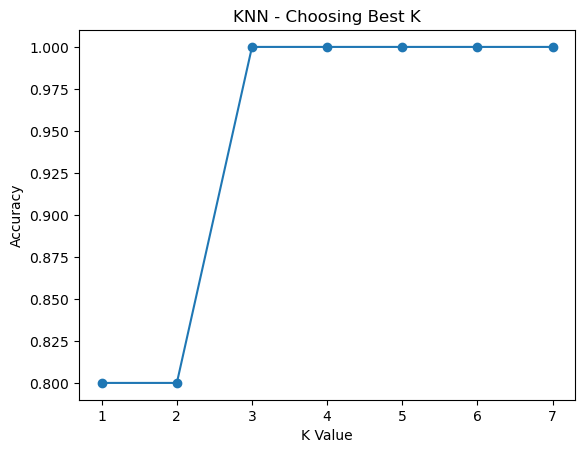

In [23]:
# Plot
plt.plot(k_values, accuracy_list, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN - Choosing Best K")
plt.show()

In [24]:
best_k = k_values[np.argmax(accuracy_list)]
print("Best K : ", best_k)


Best K :  3


In [25]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)  
knn_final.fit(x_train, y_train)

y_pred = knn_final.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

   Actual  Predicted
0       0          0
1       1          1
2       0          0
3       1          1
4       0          0


In [26]:
 import joblib

joblib.dump(knn_final, " knn_cusromer_model.pkl")
joblib.dump(sc, " scaler.pkl")

print("KNN model and scaler saved successfully!")



KNN model and scaler saved successfully!
